In [9]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The datasetis extracted')


The datasetis extracted


In [10]:
!ls

cifar-10.zip  sampleSubmission.csv  train.7z
sample_data   test.7z		    trainLabels.csv


In [11]:
# !pip install py7zr

In [13]:
!pip install py7zr
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.2/494.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 14.0 MB/s eta 0:00:00


In [14]:
!ls

cifar-10.zip  sampleSubmission.csv  train     trainLabels.csv
sample_data   test.7z		    train.7z


**Importing the Dependencies**

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [16]:
filenames=os.listdir('/content/train')

In [17]:
type(filenames)

list

In [18]:
len(filenames)

50000

In [19]:
print(filenames[0:5])
print(filenames[-5:])

['20959.png', '23746.png', '21569.png', '12663.png', '743.png']
['11825.png', '27792.png', '45043.png', '3204.png', '36872.png']


**labels processing**

In [20]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [21]:
labels_df.shape

(50000, 2)

In [22]:
labels_df.head()

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile

In [23]:
labels_df[labels_df['id']==7796]

id label
7795  7796  frog

In [24]:
labels_df.tail(10)

id       label
49990  49991        deer
49991  49992        bird
49992  49993    airplane
49993  49994  automobile
49994  49995    airplane
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

In [27]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [28]:
label_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels=[label_dictionary[i] for i in labels_df['label']]

In [29]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


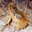

In [25]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/7796.png')
cv2_imshow(img)

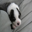

In [30]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [31]:
labels_df[labels_df['id']==45888]

id label
45887  45888   dog

In [32]:
labels_df.head()

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile

In [33]:
id_list=list((labels_df['id']))

In [34]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**image processing**

In [35]:
# converts images to numpy arrays
train_data_folder='/content/train/'
data=[]
for id in id_list:
  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [36]:
type(data)

list

In [37]:
len(data)

50000

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
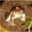

In [40]:
data[0]

In [41]:
import numpy as np

# covert image and labels to numpy arrays
x=np.array(data)
y=np.array(labels)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# scalling the data
x_train_scaled=x_train/225
x_test_scaled=x_test/225

In [42]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


**train test split**

In [43]:
# train test split code moved to cell MdL0rYOZEwgT

In [44]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [45]:
# scalling the data code moved to cell MdL0rYOZEwgT

In [46]:
x_train_scaled

array([[[[0.92888889, 0.93333333, 0.90222222],
         [0.94666667, 0.95111111, 0.92888889],
         [0.96888889, 0.97333333, 0.95555556],
         ...,
         [0.56444444, 0.32888889, 0.17333333],
         [0.54222222, 0.30222222, 0.15555556],
         [0.51555556, 0.28      , 0.14222222]],

        [[0.93333333, 0.93333333, 0.89777778],
         [0.94666667, 0.95111111, 0.92      ],
         [0.96888889, 0.97777778, 0.95111111],
         ...,
         [0.55111111, 0.31111111, 0.15555556],
         [0.53777778, 0.29777778, 0.14666667],
         [0.54666667, 0.30666667, 0.16      ]],

        [[0.91555556, 0.91111111, 0.86666667],
         [0.92888889, 0.92888889, 0.89777778],
         [0.94666667, 0.95555556, 0.92888889],
         ...,
         [0.55111111, 0.31111111, 0.16444444],
         [0.58222222, 0.34222222, 0.18666667],
         [0.58222222, 0.34666667, 0.18222222]],

        ...,

        [[0.56444444, 0.48      , 0.43111111],
         [0.61333333, 0.54222222, 0.48888889]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
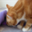

In [47]:
x_train[0]

**Building the Neural network**

In [49]:
import tensorflow as tf
from tensorflow import keras


In [50]:
num_of_classes=10
# sitting the layes of Neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# compile the Neural network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc']
)

In [52]:
# traning the Neural network
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2343 - loss: 2.0969 - val_acc: 0.3300 - val_loss: 1.8539
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3300 - loss: 1.8693 - val_acc: 0.3475 - val_loss: 1.8082
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3532 - loss: 1.8215 - val_acc: 0.3655 - val_loss: 1.7733
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.3598 - loss: 1.8023 - val_acc: 0.3640 - val_loss: 1.7591
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3643 - loss: 1.7832 - val_acc: 0.3683 - val_loss: 1.7665
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3683 - loss: 1.7655 - val_acc: 0.3460 - val_loss: 1.8049
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3790 - loss: 1.7439 - val_acc: 0.3438 - val_loss: 1.8029
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3835 - loss: 1.7410 - val_acc: 0.3730 - val_loss: 1.7377
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [55]:
# Imports moved to cell IU-O40e6JRAQ

In [56]:
# convoutional_base definition moved to cell IU-O40e6JRAQ

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

convoutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

num_of_classes=10
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convoutional_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [58]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [59]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 343ms/step - acc: 0.4118 - loss: 1.7794 - val_acc: 0.8285 - val_loss: 0.5760
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.8431 - loss: 0.6317 - val_acc: 0.9280 - val_loss: 0.2681
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9235 - loss: 0.3978 - val_acc: 0.9312 - val_loss: 0.2480
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9608 - loss: 0.2683 - val_acc: 0.9413 - val_loss: 0.2283
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9796 - loss: 0.1946 - val_acc: 0.9395 - val_loss: 0.2293
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9856 - loss: 0.1519 - val_acc: 0.9377 - val_loss: 0.2329
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9890 - loss: 0.1219 - val_acc: 0.9410 - val_loss: 0.2189
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 345ms/step - acc: 0.9912 - loss: 0.1056 - val_acc: 0.9390 - val_loss: 0.2331
Epoch 9/

In [60]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('test accuracy=',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 108ms/step - acc: 0.9343 - loss: 0.2659
test accuracy= 0.9369000196456909


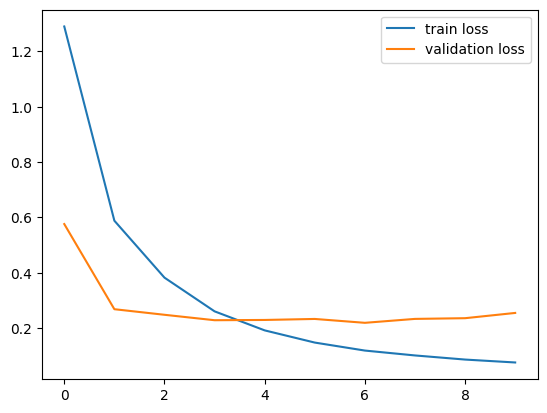

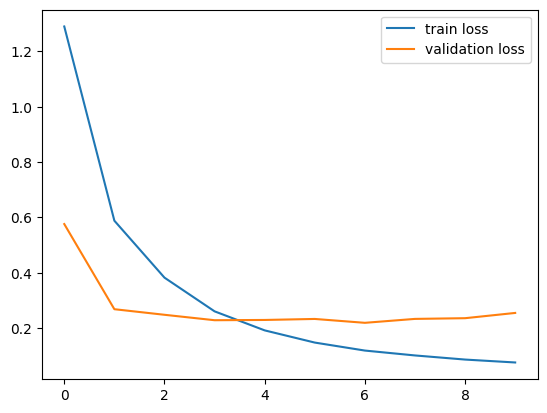

In [61]:
h=history
# plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
#  plot the accracy value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()